## Foundations of Data Science - 2020 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go



### Exercise 7.1 (Toy Example of SVD). 


In [2]:
A = np.array([[1, 2],
              [3, 1],
              [2, 3]])

(a) Use python to compute its SVD and its 1-truncated SVD. <br>
(b) Plot the rows of the data matrix A and the rows of its 1-truncated SVDA1 as points. <br>
(c) Compare to the first Lemma about the k-truncated SVD.  <br>
*Lemma. The rows of $A_{k}$ are the projections of the rows of $A$ to the best-fit k-subspace $V_{k}$ spanned by the first $k$ singular vectors of $A$.*  <br>
Hint: You may want to repeat the previous with a few other matrices A.

In [3]:
U, S , V_T = np.linalg.svd(A, full_matrices=False)

#### To find $A_{1}$, we use $A_{1}=U_{1} \cdot S_{1} \cdot V^{T}_{1}$ where $U_{1}$ is the first column of $U$, $S_{1}$ is the diagonal matrix only containing the first eigenvalue and $V_{1}$ is the first row of $V^{T}$. The result is a matrix with the same dimension as A but rank 1.

In [4]:
A1 = U[:, :1] * S[:1] @ V_T[:1, :]
print(A1)

[[1.5 1.5]
 [2.  2. ]
 [2.5 2.5]]


#### Lemma: k-truncated A can be calculated as
$A_{k} = \sum_{i<k}{\sigma_{i} |u_{i} \rangle  \langle v_{i}|}$

In [5]:
A1_lemma = S[0]*np.outer(U[:,0], V_T[0,:])
print(A1_lemma)

[[1.5 1.5]
 [2.  2. ]
 [2.5 2.5]]


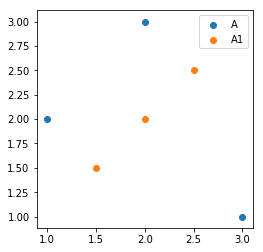

In [6]:
plt.scatter(x=A[:,0], y=A[:,1], label='A')
plt.scatter(x=A1[:,0], y=A1[:,1], label='A1')
plt.legend() 
plt.axis('scaled')
plt.show()

#### Wrap formula into function and plot some random matrices A

In [7]:
def k_truncated(A, k=1):
    U, S, V_T = np.linalg.svd(A, full_matrices=False)
    return U[:, :k] * S[:k] @ V_T[:k, :]

In [8]:
def plot_As():
    
    fig, axs = plt.subplots(3, 3,figsize=(12, 12))
    
    for col in range(3):
        for row in range(3):
            
            A = np.random.random(size=(np.random.randint(3, 100), 2))            
            A1 = k_truncated(A)
            
            axs[row, col].scatter(x=A[:,0], y=A[:,1], label='A')
            axs[row, col].scatter(x=A1[:,0], y=A1[:,1], label='A1')
            axs[row, col].get_xaxis().set_visible(False)
            axs[row, col].get_yaxis().set_visible(False)
            axs[row, col].axis('scaled')
            
    axs[0, 2].legend()     
    plt.show()

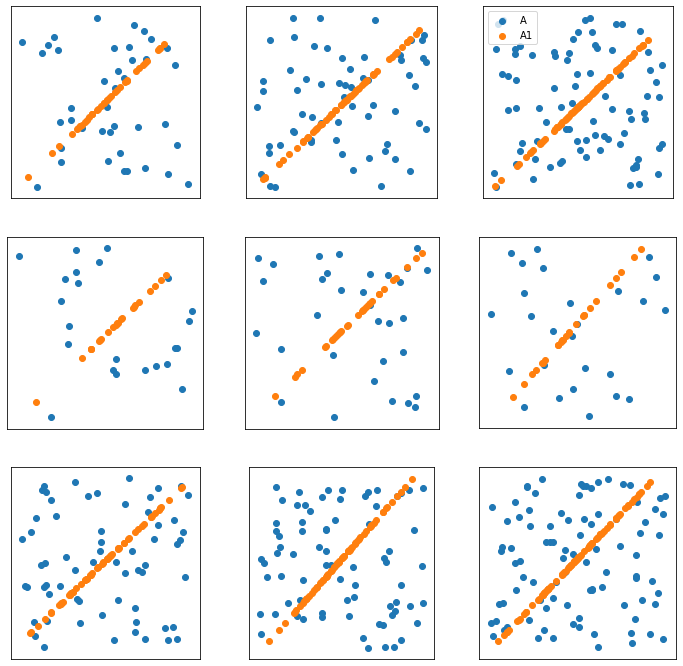

In [9]:
plot_As()